# Tagup Data Science Exercise

ExampleCo, Inc is gathering several types of data for its fleet of very expensive machines.  These very expensive machines have three operating modes: *normal*, *faulty* and *failed*.   The machines run all the time, and usually they are in normal mode.  However, in the event that the machine enters faulty mode, the company would like to be aware of this as soon as possible.  This way they can take preventative action to avoid entering failed mode and hopefully save themselves lots of money.

They collect four kinds of timeseries data for each machine in their fleet of very expensive machines.  When a machine is operating in *normal* mode the data behaves in a fairly predictable way, but with a moderate amount of noise.  Before a machine fails it will ramp into *faulty* mode, during which the data appears visibly quite different.  Finally, when a machine fails it enters a third, and distinctly different, *failed* mode where all signals are very close to 0.

You can download the data here: [exampleco_data](https://drive.google.com/open?id=1b12u6rzkG1AxB6wLGl7IBVoaoSoZLHNR)

## Objectives 

1. **Your primary objective is to develop an approach to detect the beginning of the “faulty” period**. Ideally, this approach would give the ExampleCo engineers as much time as possible to shut down their machines before failure occurs (at which time all measurements drop close to 0). The best solutions are automated in the sense that they would generalize to similar but slightly different data; simpler methods are acceptable but are less likely to receive full credit.
2. Demonstrate the efficacy of your approach using visualizations. You must also include a simple explanation of these figures and why your approach is effective, ideally written in language that non-technical executives could understand.
3. Finally, and now with a technical audience in mind, discuss the strengths and limitations of your approach and be sure to mention other approaches that you would have liked to try if you had more time.


## Notes to help
1. A good place to start is by addressing the noise due to communication
   errors.
2. Feel free to use any libraries you like. Your final results should be
   presented in this Python notebook.
3. There are no constraints on the techniques you bring to bear, we are curious
   to see how you think and what sort of resources you have in your toolbox.
4. **Be sure to clearly articulate what you did, why you did it, and how the
   results should be interpreted**. In particular, you should be aware of the
   limitations of whatever approach or approaches you take.
5. Don't feel compelled to use all the data if you're not sure how. Feel free
   to focus on data from a single unit if that makes it easier to get started.
6. Don't hesitate to reach out to datasciencejobs@tagup.io with any questions!

In [ ]:
# Import all dependencies
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline 

In [6]:
#Append all the data together into one pandas dataframe
df = pd.DataFrame()
for filename in os.listdir('./Data'):
    data = pd.read_csv('./Data/'+filename,index_col=0)
    df=pd.concat([df, data])
df


,0,1,2,3
2019-01-01 00:00:00.000000000,12.626096,8.803120,-11.809200,10.083961
2019-01-01 08:00:09.603201067,10.831994,2.816327,11.554778,21.892853
2019-01-01 16:00:19.206402134,21.083510,-0.672645,-17.839178,-1.349024
2019-01-02 00:00:28.809603201,32.294495,6.525132,-13.498586,-4.250752
2019-01-02 08:00:38.412804268,28.057100,3.691359,21.984744,13.670561
...,...,...,...,...
2021-09-25 15:59:21.587195728,-0.010182,-0.003156,-0.004755,-0.003121
2021-09-25 23:59:31.190396800,0.008064,0.001037,-0.009756,0.006816
2021-09-26 07:59:40.793597872,0.022963,0.000919,-0.004079,-0.000108
2021-09-26 15:59:50.396798944,0.007192,-0.014056,-0.003627,-0.005051


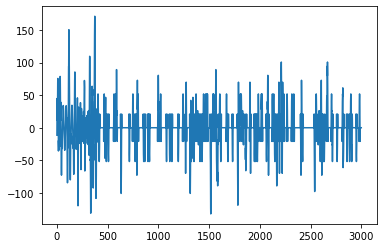

In [138]:
#You can see here that there are smoother oscillations that occur before the machine becomes haywire.
#In column zero alone you can see that the oscillation increase over time before entering the failed mode.
#This increase in oscillations may be the faulty mode we are looking for.
from scipy.signal import savgol_filter
plt.plot(range(len(pd.read_csv('./Data/machine_0.csv',index_col=0))),savgol_filter(pd.read_csv('./Data/machine_0.csv',index_col=0)['0'].tolist(), 11,3) )
plt.show()


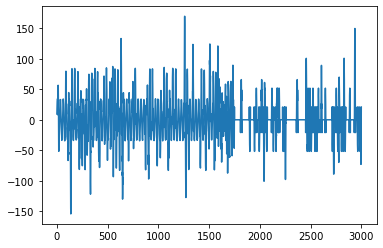

In [139]:
#Again, you can see here that there are smoother oscillations that occur before the machine becomes haywire.
#In column zero alone you can see that the oscillation increase over time before entering the failed mode.
#This increase in oscillations may be the faulty mode we are looking for.
plt.plot(range(len(pd.read_csv('./Data/machine_1.csv',index_col=0))),savgol_filter(pd.read_csv('./Data/machine_1.csv',index_col=0)['0'].tolist(), 11, 3) )
plt.show()

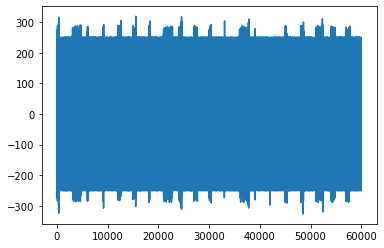

In [140]:
# The plot below shows the unsmoothed data. You can notice a lot of noise as the 0 column 
# has its points jump up and down rapidly.
plt.plot(range(len(df)), df['0'])
plt.show()

In [141]:
#smooth the data using a window size of 51 and a polynomial of degree 3 by least squares.
from scipy.signal import savgol_filter
column_0=savgol_filter(df['0'].tolist(), 11, 3)
column_1=savgol_filter(df['1'].tolist(), 11, 3)
column_2=savgol_filter(df['2'].tolist(), 11, 3)
column_3=savgol_filter(df['3'].tolist(), 11, 3)
d = {'column_0': column_0, 'column_1': column_1, 'column_2': column_2, 'column_3': column_3}
smoothed_df=pd.DataFrame(data=d)
smoothed_df

,column_0,column_1,column_2,column_3
0,-11.486090,6.490917,-6.541716,34.699913
1,30.369272,5.095486,-5.978098,-3.646040
2,44.870946,3.749476,-4.237510,-15.713239
3,40.724722,2.492235,-1.646955,-10.221713
4,26.636392,1.363113,1.466567,4.108511
...,...,...,...,...
59995,0.001191,0.578402,-0.003114,-0.001756
59996,0.005156,-18.653195,-0.005664,0.000090
59997,0.008522,-25.646591,-0.006369,0.001586
59998,0.010482,-13.991570,-0.004064,0.002448


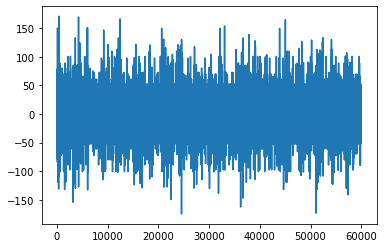

In [142]:
# The plot below show the smoothed data with a lot less jumps than before.
plt.plot(range(len(smoothed_df)), smoothed_df['column_0'])
plt.show()

In [143]:
#Do some clustering of the data. This produces a model that can classify input data as a specific class.
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

smoothed_array=np.array(smoothed_df)

model=KMeans(n_clusters=3, random_state=42).fit(smoothed_array)
model.fit(smoothed_array)
labels=model.labels_


In [160]:
#From the below outputs, one can tell that this K-means clustering ascribes the 0 prediction to the failed mode.
#The model also seems to ascribe class 1 as mostly negative numbers and class 2 as positive numbers.
#From our analysis earlier, this could imply that a rapid switching between 1 and 2 means a machine 
#is in a faulty state.
print(model.predict([[0.5, 0.5, 0.5, 0.5]]))
print(model.predict([[0, 0, 0, 0]]))
print(model.predict([[-0.5, -0.5, -0.5, -0.5]]))
print(model.predict([[-100, -100, -100, -100]]))
print(model.predict([[-50, -50, -50, -50]]))
print(model.predict([[100, 100, 100, 100]]))
print(model.predict([[50, 50, 50, 50]]))

[0]
[0]
[0]
[1]
[1]
[2]
[2]


In [157]:
#One can also see here that a long string of 2s occur before a long string of 0s. This implies that 2
#corresponds to the faulty state. An abrupt change from a string of 
print(list(labels[0:450]))

[0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 

Text(0.5, 0.92, 'Clustering in Three Categories by K-Means')

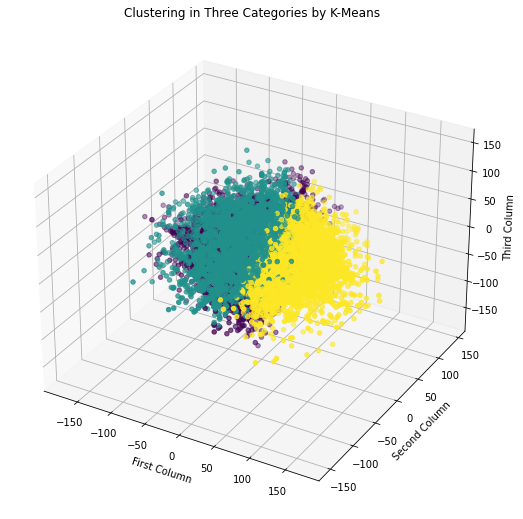

In [146]:
# This is a plot that shows that three distinct categories can be found within the data.
# These three categories should correspond to the normal, faulty, and failed modes.
from operator import itemgetter
fig_dims = (10,9)
fig = plt.figure(figsize=fig_dims)
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(list(map(itemgetter(0), smoothed_array)), list(map(itemgetter(1), smoothed_array)), list(map(itemgetter(2), smoothed_array)),c=labels)
ax.set_xlabel('First Column')
ax.set_ylabel('Second Column')
ax.set_zlabel('Third Column')
ax.set_title('Clustering in Three Categories by K-Means')

Text(0.5, 0.92, 'Clustering in Three Categories by K-Means')

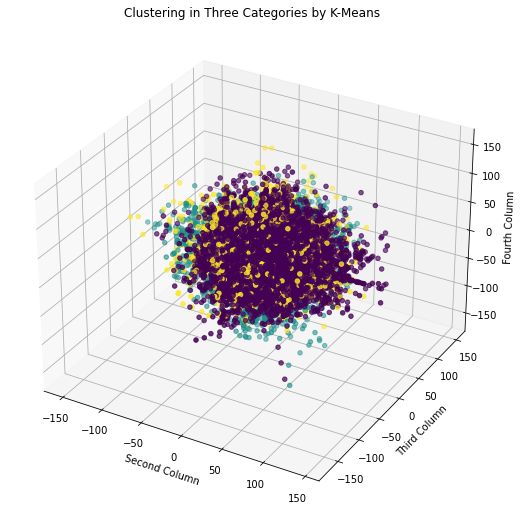

In [147]:
# This is a plot that shows that three distinct categories can be found within the data.
# The below plot takes the last three columns as data and labels them.
# These three categories should correspond to the normal, faulty, and failed modes.
from operator import itemgetter
fig_dims = (10,9)
fig = plt.figure(figsize=fig_dims)
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(list(map(itemgetter(1), smoothed_array)), list(map(itemgetter(2), smoothed_array)), list(map(itemgetter(3), smoothed_array)),c=labels)
ax.set_xlabel('Second Column')
ax.set_ylabel('Third Column')
ax.set_zlabel('Fourth Column')
ax.set_title('Clustering in Three Categories by K-Means')

In summary, a failed state occurs when a machine, using the above model, is predicted to have a class of 0 for a long period of time. This seems to occur after the model predicts 1 and 2 in quick sucession. Thus, if we say take a moving average of the predictions on data as it is entered, once the moving average stabilizes around 1.5 we know that the system is in the faulty state. This could be used as a warning sign for engineers to fix specific machines.